# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Breast Cancer Dataset

In [3]:
df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


## Getting basic ideas of the Dataset

In [4]:
df.shape

(54706, 14)

In [5]:
df.shape

(54706, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [26]:
df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


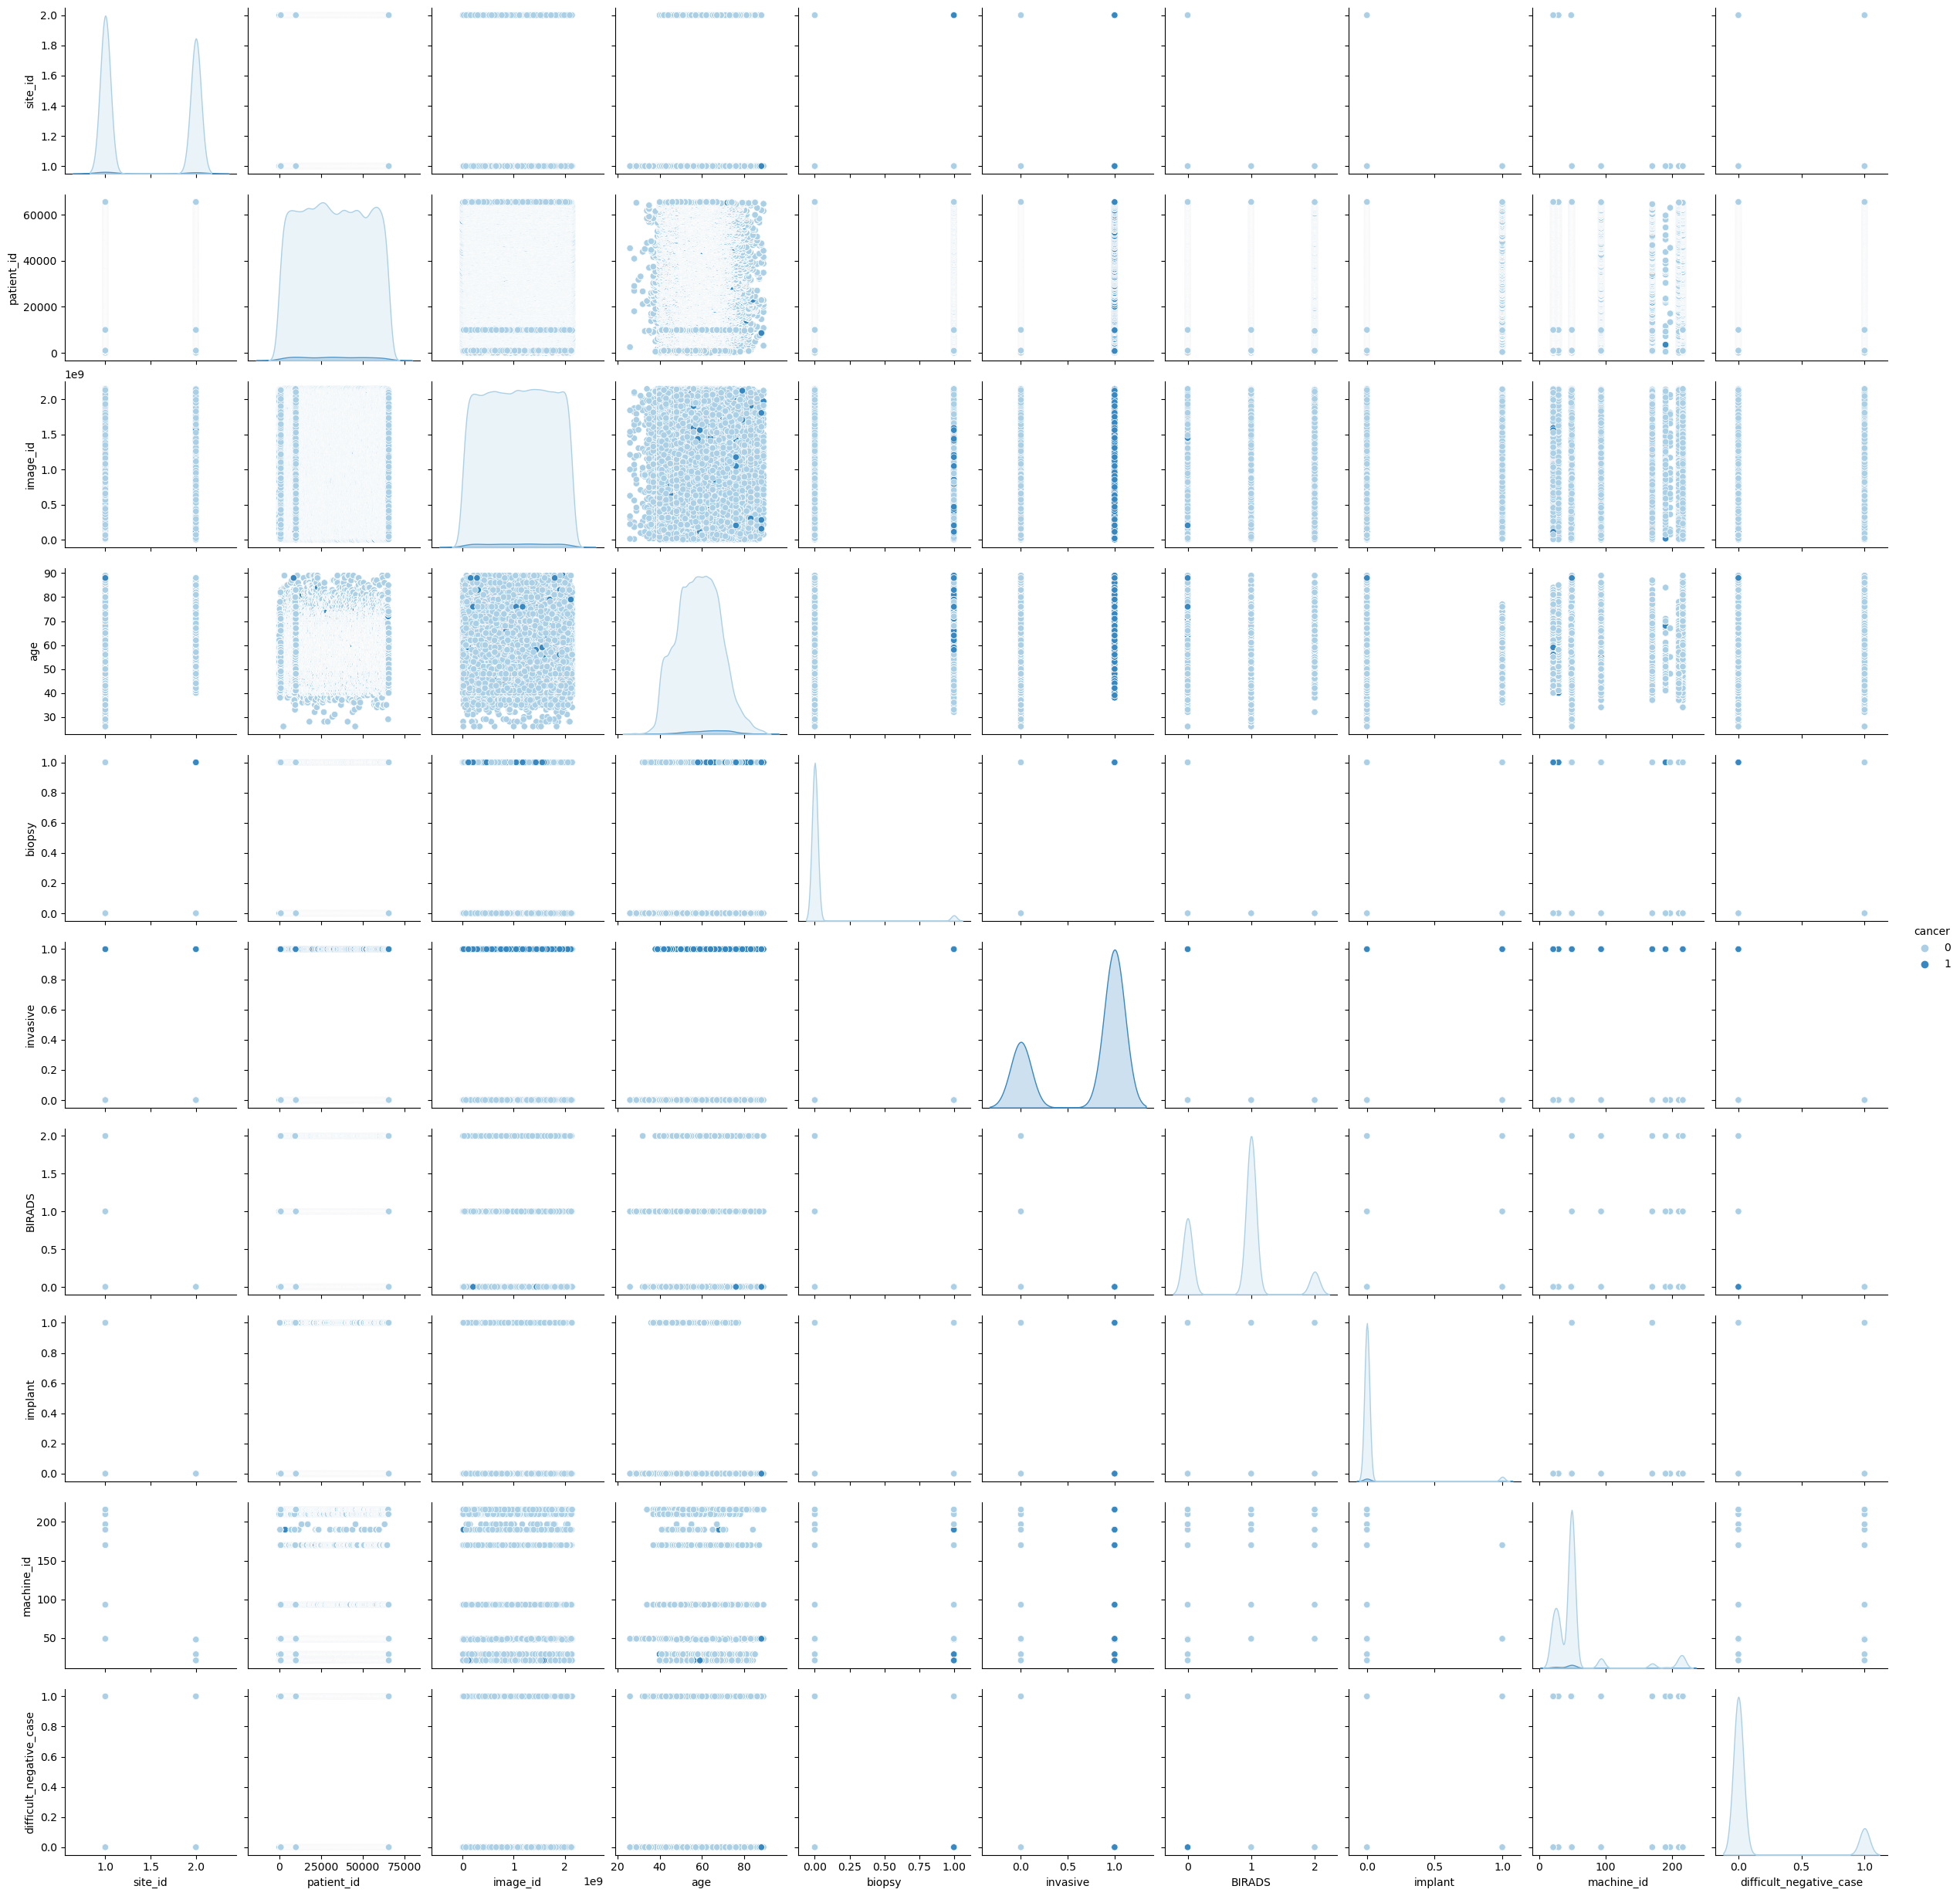

In [16]:
plt.rcParams['font.size']= 10
sns.pairplot(df,hue='cancer', palette='Blues')

# Data Visualization

#### 1. Distribution of ages of woman with breast cancer

/tmp/ipykernel_32/1216892886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, color= 'b', kde =True, bins=12)


Text(0.5, 1.0, 'Distribution of Ages of Women with Breast Cancer')

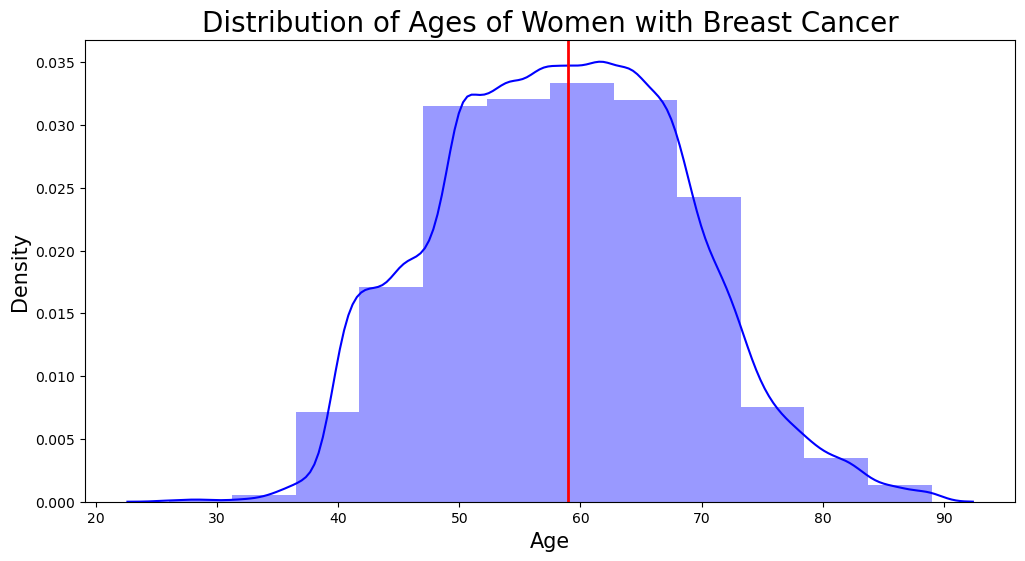

In [18]:
plt.figure(figsize=(12,6))
median_age = df.age.median()
sns.distplot(df.age, color= 'b', kde =True, bins=12)
plt.axvline(median_age
            ,color='red',linewidth=2,label='Median Age')
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel('Density',fontdict={'fontsize':15})
plt.title("Distribution of Ages of Women with Breast Cancer",fontdict={'fontsize':20})

Ages between 48 to 73 are most suffer from Brest Cancer

In [19]:
df.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

In [25]:
df.cancer.value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

#### 2. Tumor for different Ages and existing Implant

Text(0.5, 1.0, 'Tumor Sizes for different Ages and having implants')

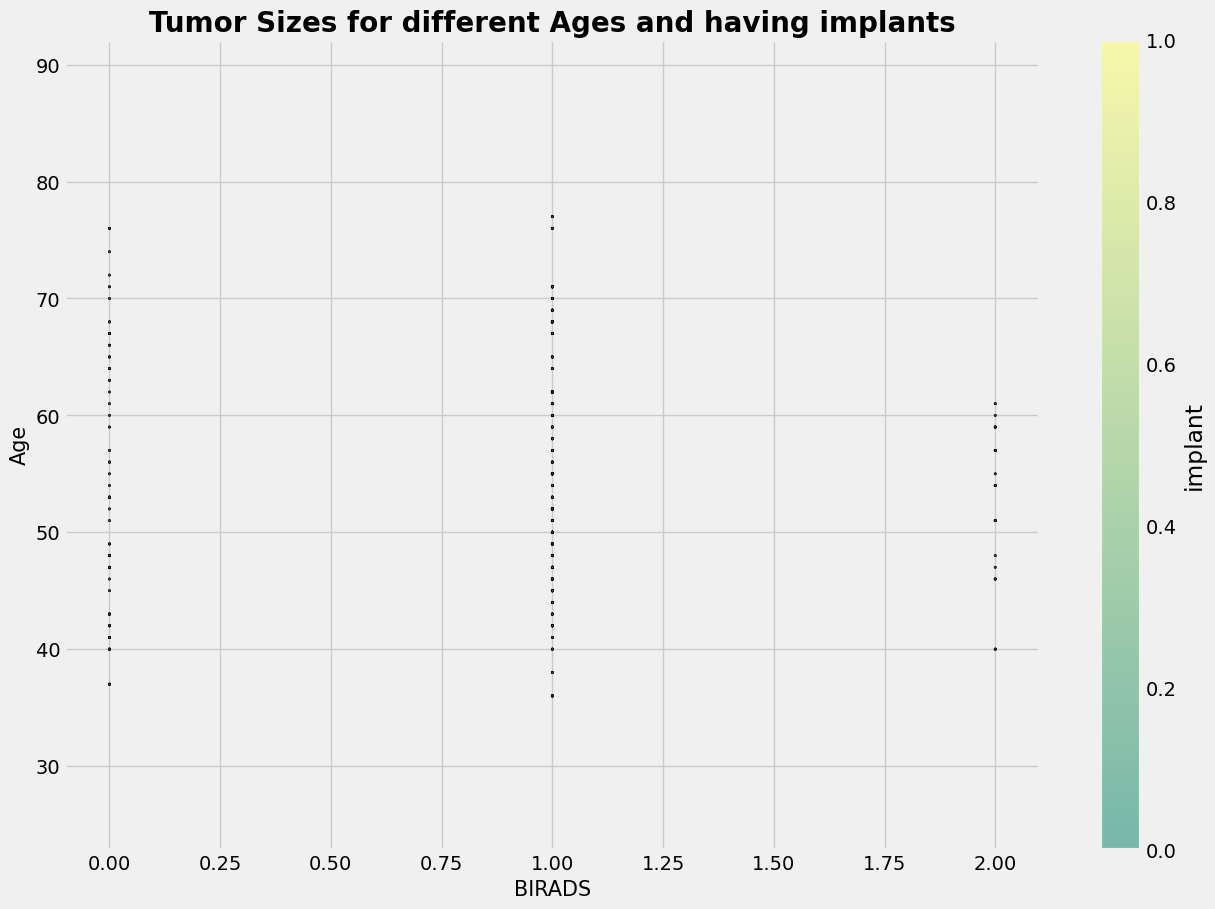

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,10))
plt.scatter(df.BIRADS,df['age'],s=df['implant'],c=df['implant'],edgecolor='k',
            cmap='summer',alpha=0.50,linewidth=1)
plt.colorbar().set_label('implant')
plt.xlabel("BIRADS",fontdict={'fontsize': 15})
plt.ylabel("Age",fontdict={'fontsize': 15})
plt.title("Tumor Sizes for different Ages and having implants",fontdict={'fontsize': 20},
          fontweight="bold")